In [26]:
#import data handling libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#read in the main dataset
df = pd.read_csv('final_dataset_Nov_24.csv')

df

,ENT_SEM,GRAD_SEM,25,101,104,105,106,140,142,143,...,SEM6.0_cdf,SEM6.5_cdf,SEM7.0_cdf,SEM7.5_cdf,SEM8.0_cdf,SEM8.5_cdf,SEM9.0_cdf,SEM9.5_cdf,slope,intercept
0,20.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1.368421e-01,5.444869e-17
1,19.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,3,3,3,3,2.701754e-01,1.017544e+00
2,19.6,3.4,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1.543860e-01,-1.929825e-01
3,16.6,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,6,6,6,7,7,7,7.824561e-01,3.508772e-02
4,18.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,-2.363863e-17,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,14.6,4.8,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,-2,-2,-2,-2,-2,-2,-2,-2,-1.368421e-01,-1.052632e+00
9428,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,8.421053e-02,4.210526e-01
9429,13.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1.543860e-01,1.929825e-01
9430,14.6,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,2,2,2,2,2.385965e-01,7.017544e-02


In [27]:
df['Y'].value_counts()

Y
1    4892
0    4540
Name: count, dtype: int64

In [28]:
df['SEM9.5_cdf'].value_counts()

SEM9.5_cdf
 1     4787
 2     1491
-1     1137
 3      576
 0      414
 4      281
 5      147
-2       96
 7       88
 6       85
 10      61
 8       60
 9       50
 11      50
 12      46
 13      31
 14      12
 15       7
-3        7
 16       3
 17       2
 18       1
Name: count, dtype: int64

In [29]:
courses = ['25',
 '101',
 '104',
 '105',
 '106',
 '140',
 '142',
 '143',
 '150',
 '151',
 '160',
 '165',
 '166',
 '181',
 '201',
 '207',
 '240',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '341',
 '342',
 '350',
 '365',
 '373',
 '385',
 '397',
 '414',
 '415',
 '435',
 '436',
 '492',
 '495',
 '500']

print('Overall grad rate:', df['Y'].mean())

features = courses + ['ENT_SEM', 'SEM9.5_cdf','slope','intercept']
random_states = np.random.randint(0, 10000, size=5).tolist()

print('Random states:', random_states)

splits = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

Overall grad rate: 0.518659881255301
Random states: [769, 5408, 3747, 6705, 234]


In [30]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models):
    y_pred = search.predict(splits[i][1])
    xgb_df.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df.loc[i, 'test_accuracy'] = accuracy_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_precision'] = precision_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_recall'] = recall_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_f1'] = f1_score(splits[i][3], y_pred)
xgb_df

Best accuracy for split 0:  69.132%
Best accuracy for split 1:  69.357%
Best accuracy for split 2:  69.211%
Best accuracy for split 3:  69.344%
Best accuracy for split 4:  68.350%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.691319,0.678325,0.710407,0.641471,0.674181
1,0.693572,0.687334,0.709817,0.672114,0.690451
2,0.692114,0.682035,0.706652,0.6619,0.683544
3,0.693439,0.683625,0.705819,0.66905,0.686943
4,0.683499,0.719131,0.739084,0.708887,0.72367


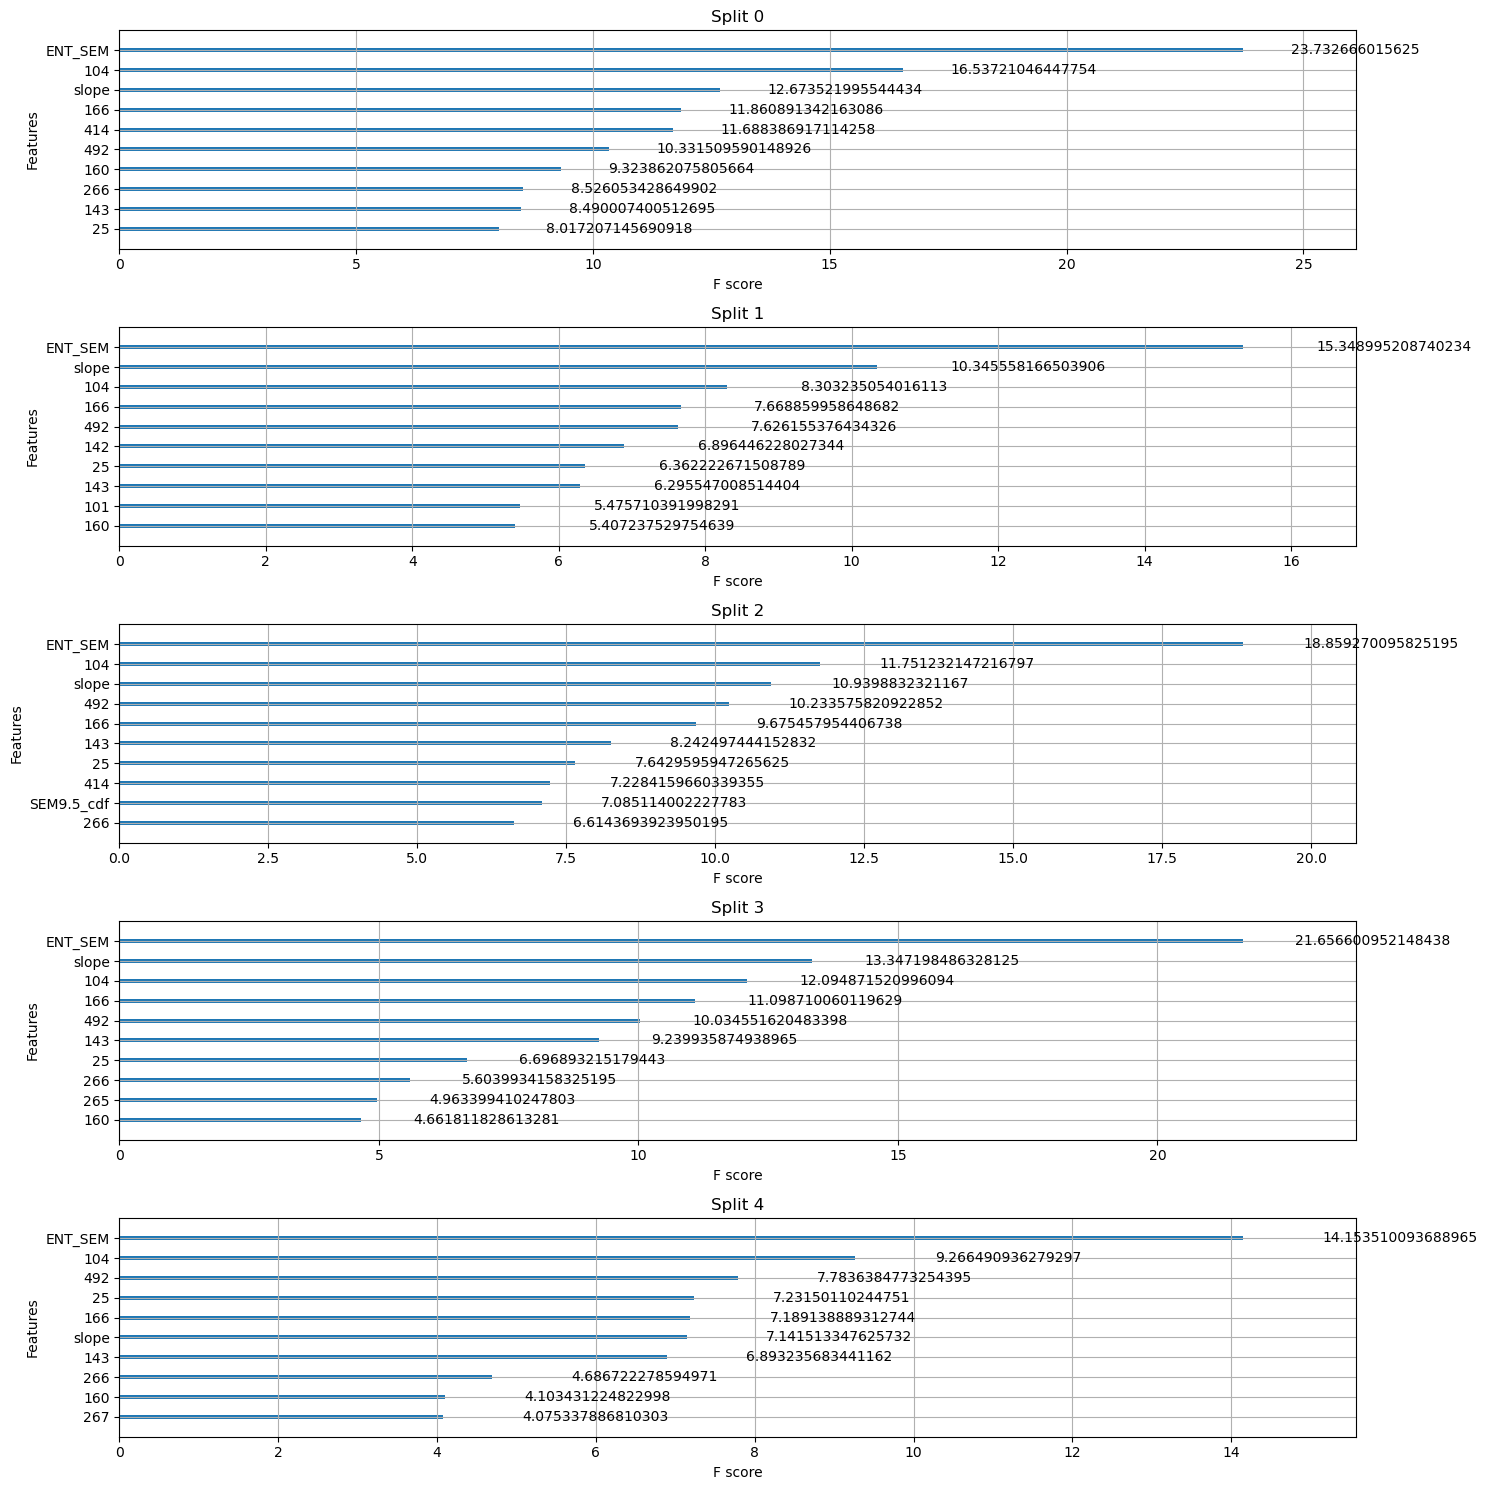

In [31]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

for i, search in enumerate(xgb_models):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='gain', 
                        max_num_features=10,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()

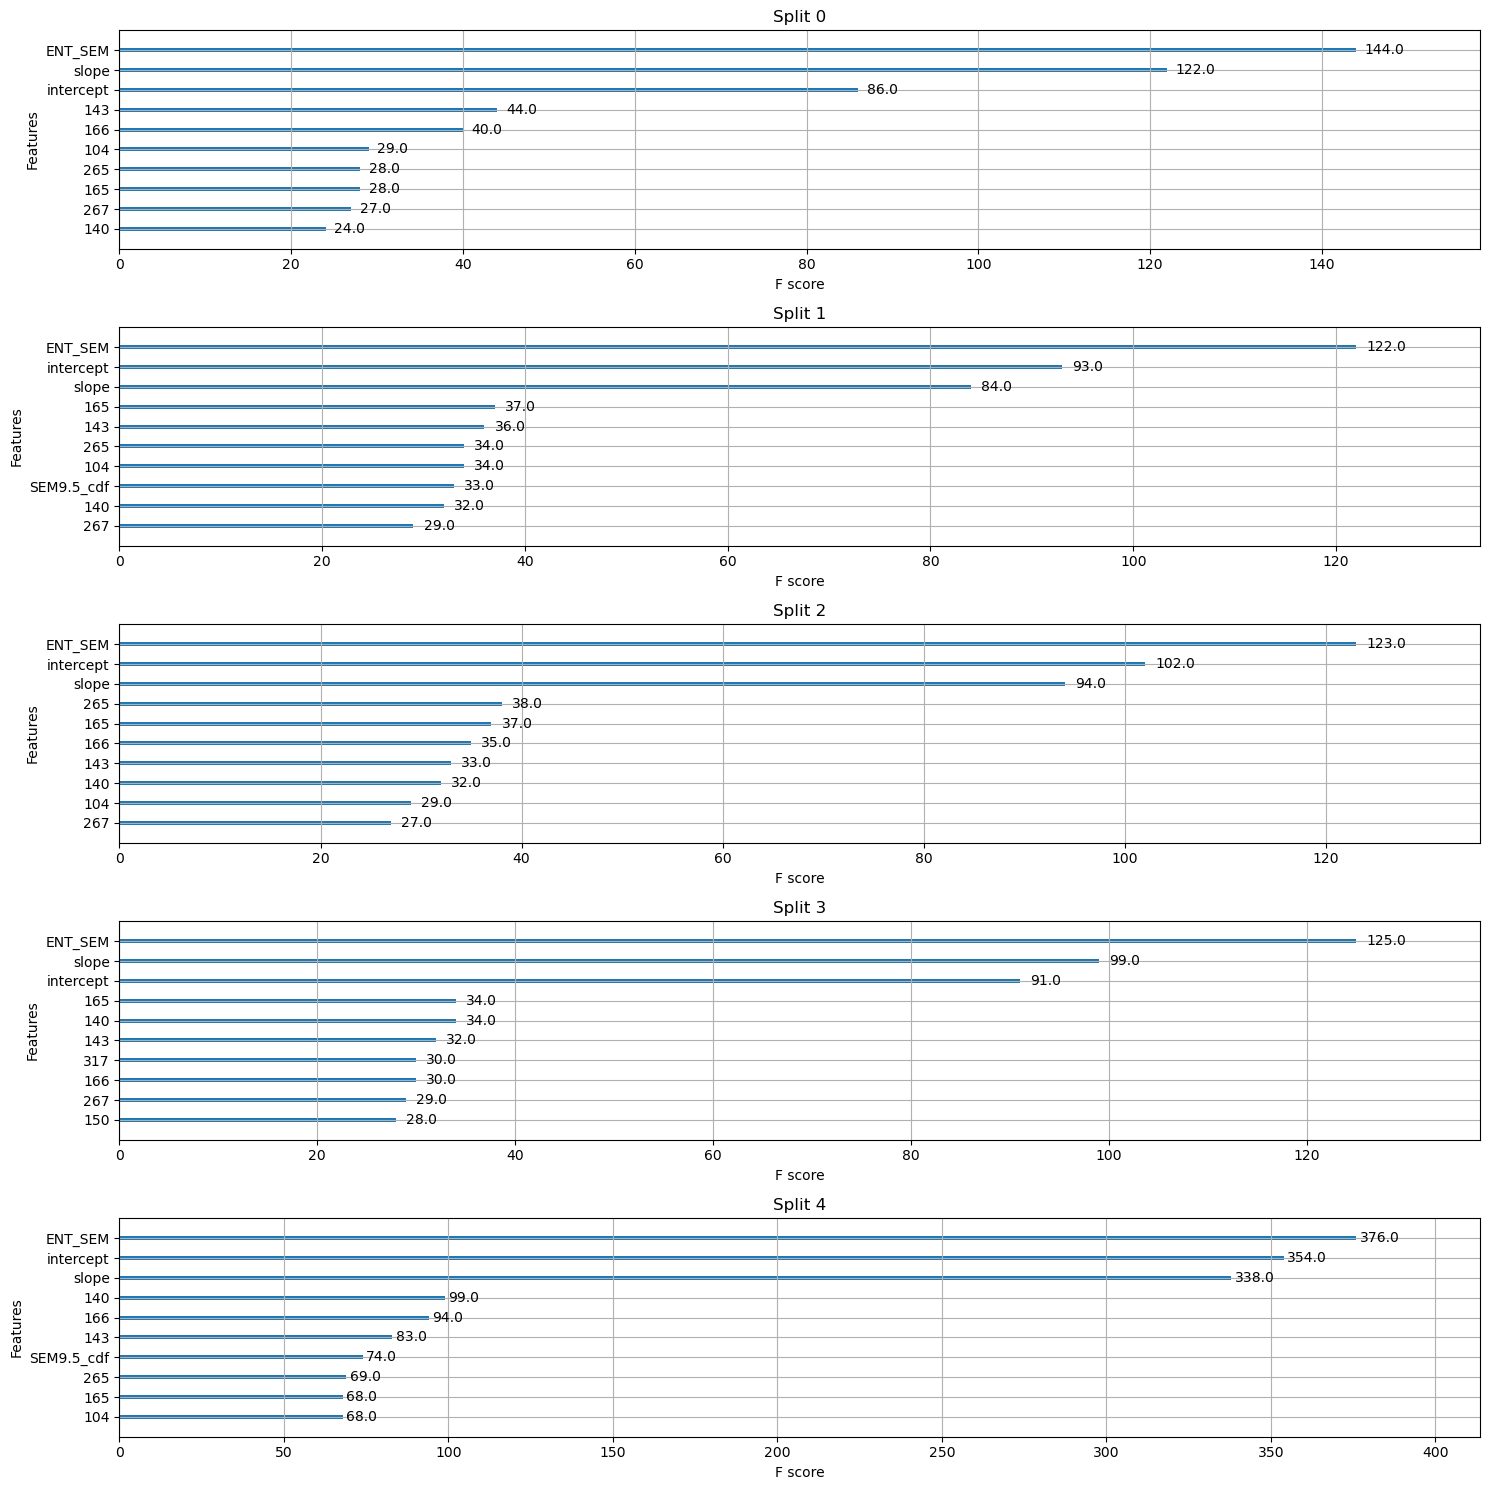

In [32]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

for i, search in enumerate(xgb_models):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='weight', 
                        max_num_features=10,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()

In [33]:
features2 = ['ENT_SEM', 'SEM9.5_cdf','slope','intercept']

splits_2 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features2], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_2.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_2 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_2):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_2.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

Best accuracy for split 0:  64.029%
Best accuracy for split 1:  64.122%
Best accuracy for split 2:  63.777%
Best accuracy for split 3:  63.605%
Best accuracy for split 4:  63.923%


In [34]:
#get the top 20 courses with largest enrollment (i.e. non-zero values in the dataset)
top_courses = df[courses].abs().sum().sort_values(ascending=False).index[:20].to_list()
top_courses

['166',
 '265',
 '165',
 '104',
 '140',
 '207',
 '150',
 '317',
 '414',
 '301',
 '201',
 '267',
 '143',
 '492',
 '266',
 '105',
 '341',
 '160',
 '436',
 '435']

In [35]:
features_3 = ['ENT_SEM', 'SEM9.5_cdf','slope','intercept','SEM4.5_cdf','SEM2.0_cdf'] + top_courses
splits_3 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features_3], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_3.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_3 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_3):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_3.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

Best accuracy for split 0:  68.721%
Best accuracy for split 1:  68.907%
Best accuracy for split 2:  68.893%
Best accuracy for split 3:  69.105%
Best accuracy for split 4:  67.806%


In [36]:
xgb_df_3 = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_3):
    y_pred = search.predict(splits_3[i][1])
    xgb_df_3.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_3.loc[i, 'test_accuracy'] = accuracy_score(splits_3[i][3], y_pred)
    xgb_df_3.loc[i, 'test_precision'] = precision_score(splits_3[i][3], y_pred)
    xgb_df_3.loc[i, 'test_recall'] = recall_score(splits_3[i][3], y_pred)
    xgb_df_3.loc[i, 'test_f1'] = f1_score(splits_3[i][3], y_pred)
xgb_df_3

,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.68721,0.683625,0.716553,0.645557,0.679205
1,0.689066,0.687334,0.713971,0.662921,0.6875
2,0.688933,0.679915,0.704471,0.659857,0.681435
3,0.691054,0.684685,0.707343,0.66905,0.687664
4,0.678065,0.708002,0.737251,0.679265,0.707071


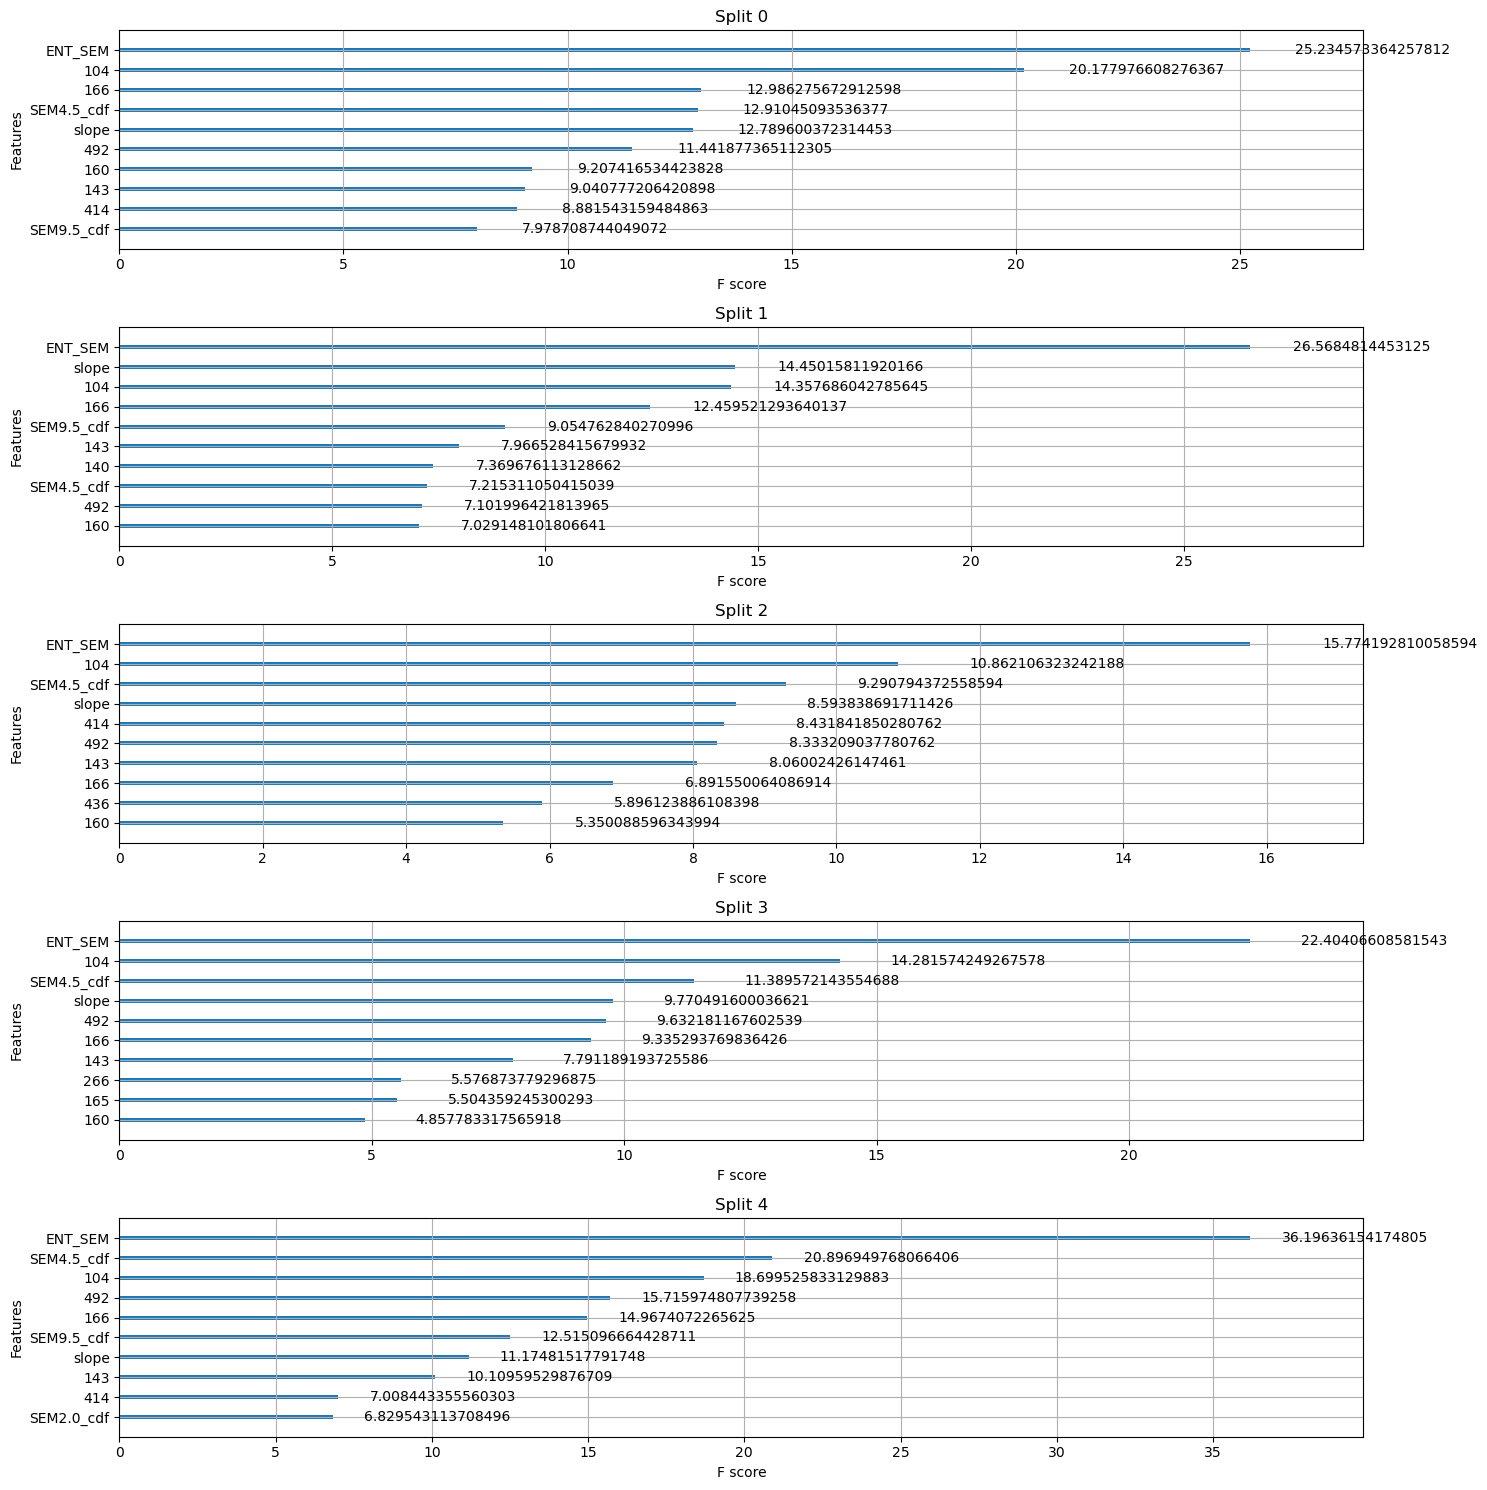

In [37]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

for i, search in enumerate(xgb_models_3):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='gain', 
                        max_num_features=10,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()

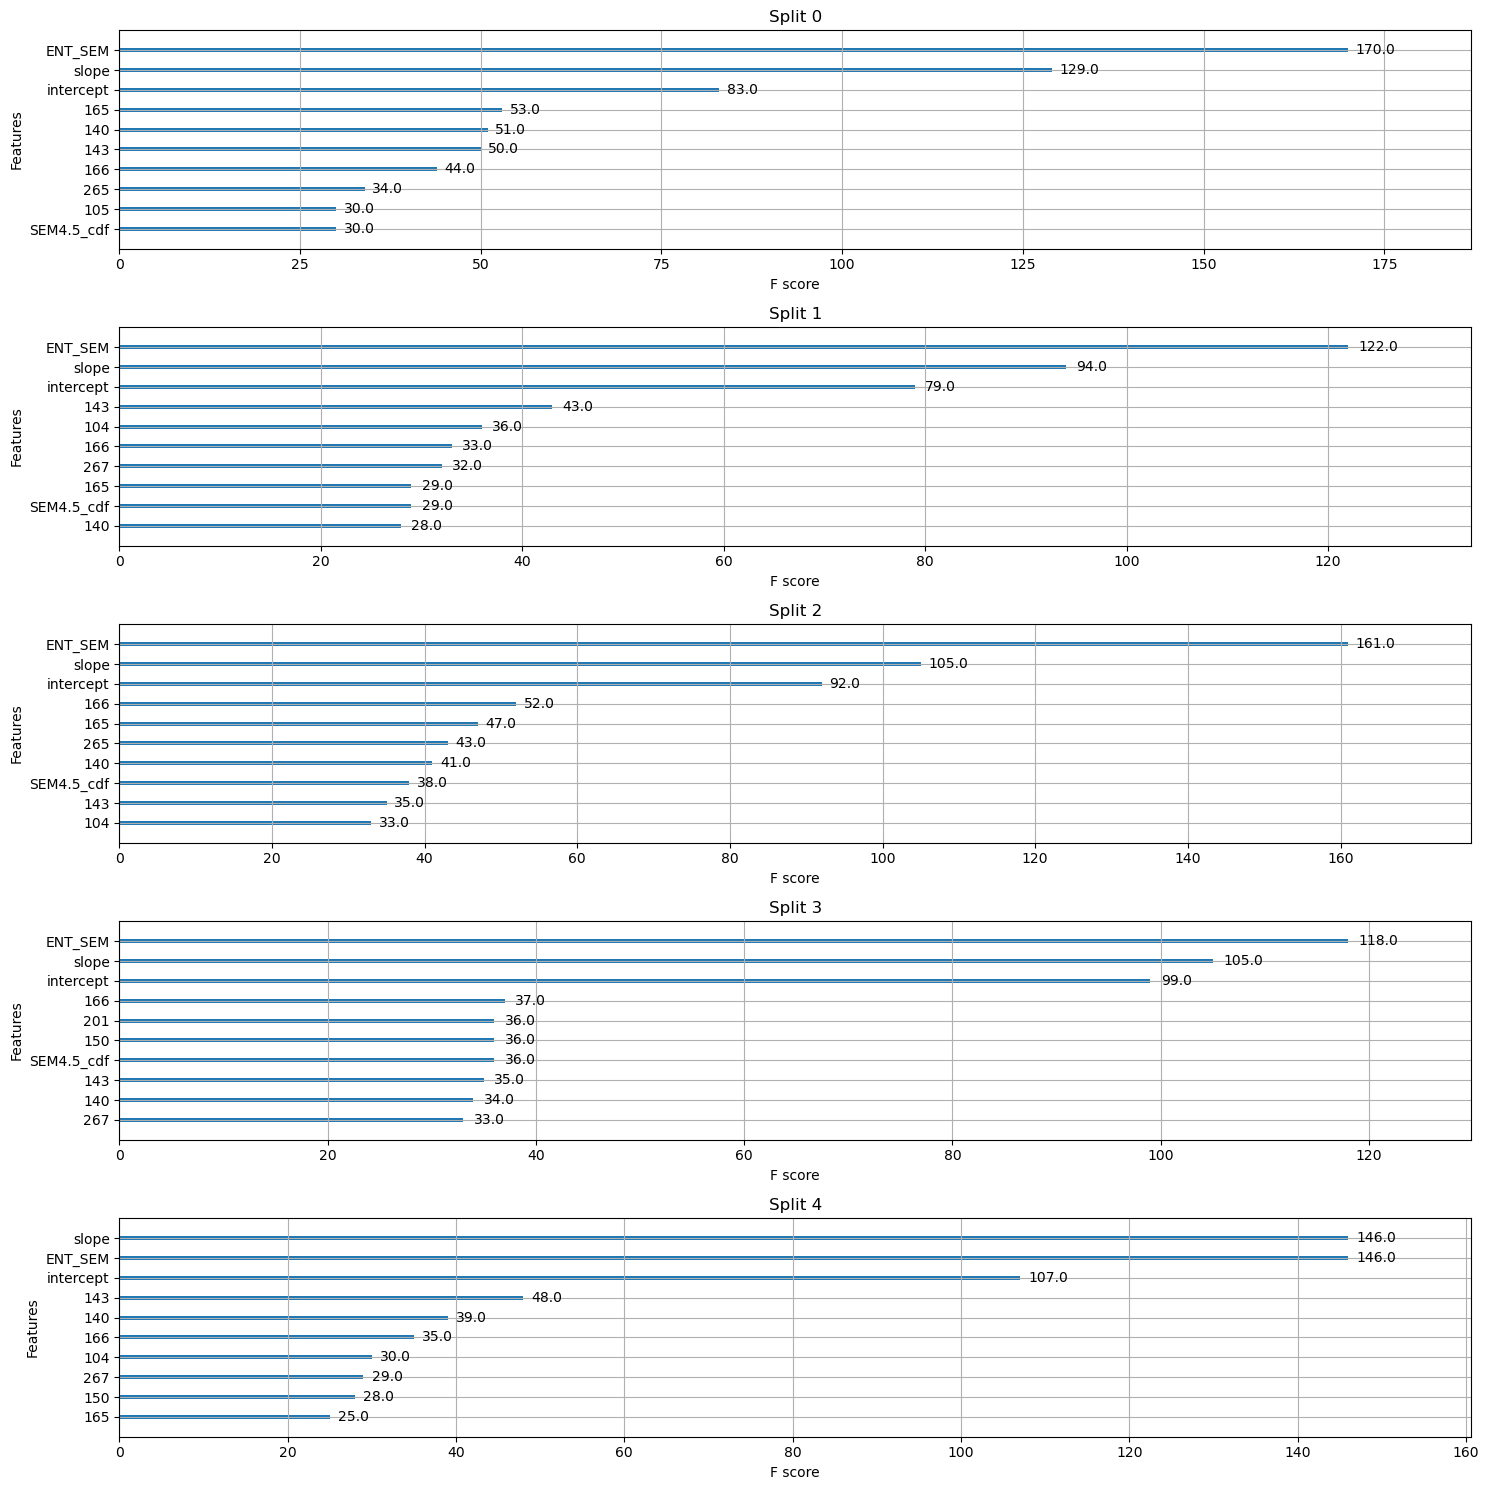

In [38]:
#for each xgb model, plot the feature importances (normalized to add up to 100)
#make each of these a subplot
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

for i, search in enumerate(xgb_models_3):
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='weight', 
                        max_num_features=10,
                        title=f'Split {i}')

plt.tight_layout() 
plt.show()

In [39]:
features_4 = features_3[1:]
splits_4 = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[features_4], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_4.append((X_train, X_test, y_train, y_test))

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [150],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models_4 = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_4):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_4.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df_4 = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_4):
    y_pred = search.predict(splits_4[i][1])
    xgb_df_4.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_4.loc[i, 'test_accuracy'] = accuracy_score(splits_4[i][3], y_pred)
    xgb_df_4.loc[i, 'test_precision'] = precision_score(splits_4[i][3], y_pred)
    xgb_df_4.loc[i, 'test_recall'] = recall_score(splits_4[i][3], y_pred)
    xgb_df_4.loc[i, 'test_f1'] = f1_score(splits_4[i][3], y_pred)
xgb_df_4

Best accuracy for split 0:  65.620%
Best accuracy for split 1:  65.381%
Best accuracy for split 2:  65.686%
Best accuracy for split 3:  65.606%
Best accuracy for split 4:  64.891%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.656196,0.658718,0.678002,0.651685,0.664583
1,0.65381,0.653948,0.678728,0.632278,0.65468
2,0.656859,0.647589,0.668455,0.636364,0.652015
3,0.656064,0.649179,0.667018,0.646578,0.656639
4,0.648907,0.670906,0.681542,0.686415,0.683969


<Figure size 1000x600 with 0 Axes>

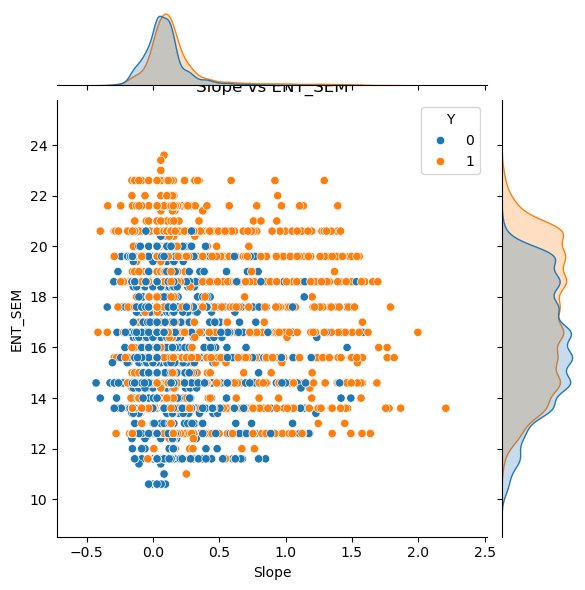

In [42]:
#plot a scatterplot of slope vs ENT_SEM. Color the points by the value of Y
plt.figure(figsize=(10, 6))
sns.jointplot(x='slope', y='ENT_SEM', data=df, hue='Y')
plt.xlabel('Slope')
plt.ylabel('ENT_SEM')
plt.title('Slope vs ENT_SEM')
plt.show()

/opt/anaconda3/envs/erdos_fall_2024/lib/python3.12/site-packages/seaborn/axisgrid.py:1696: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


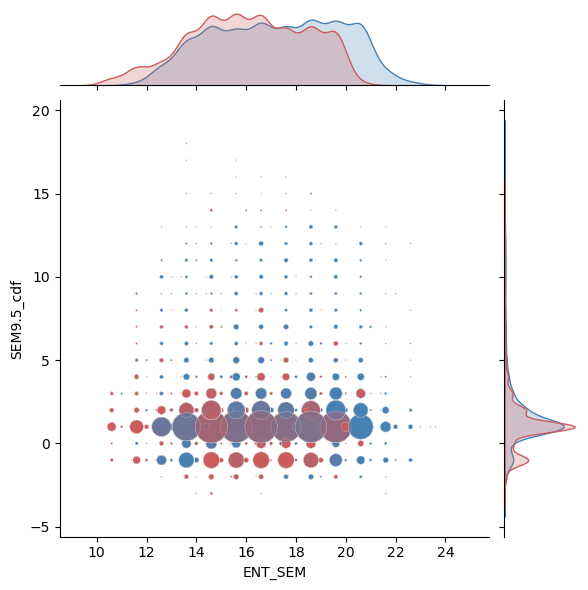

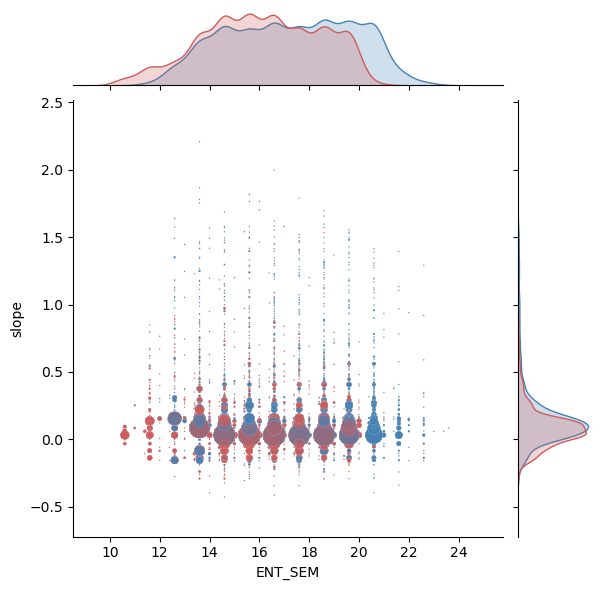

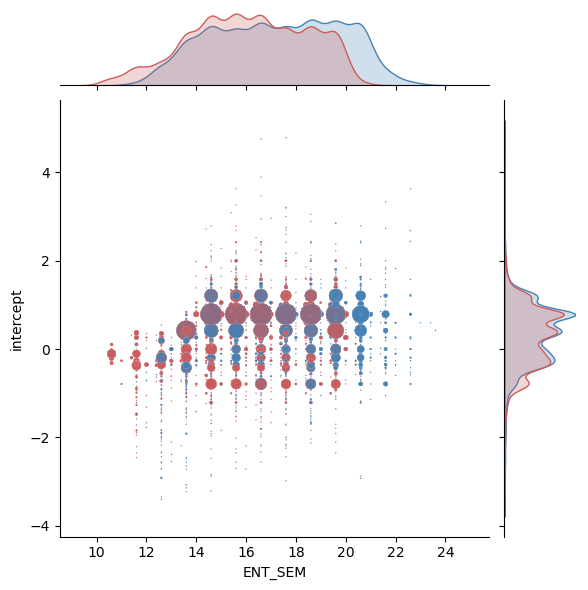

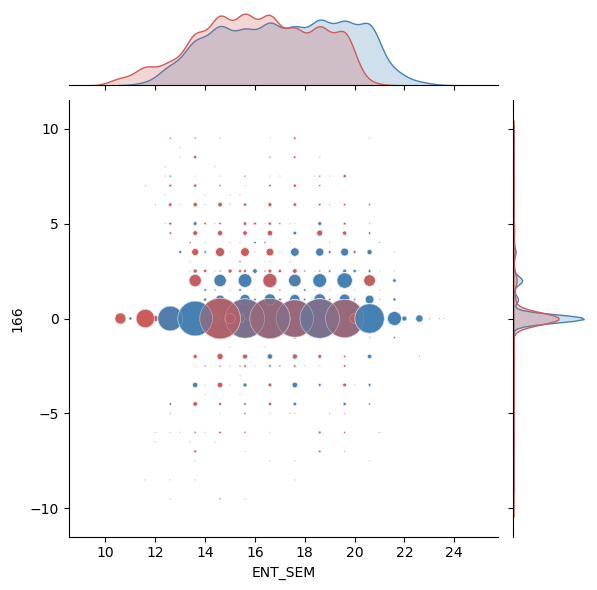

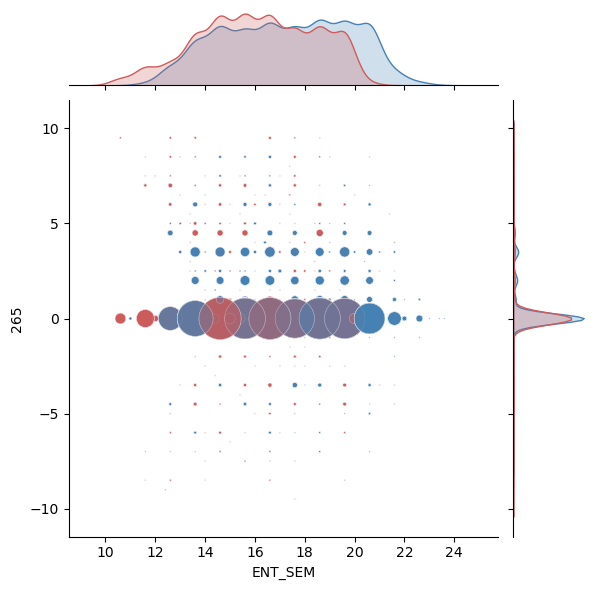

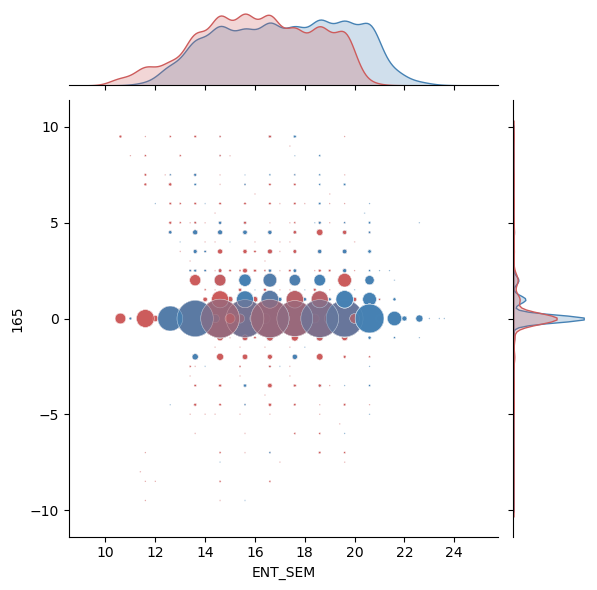

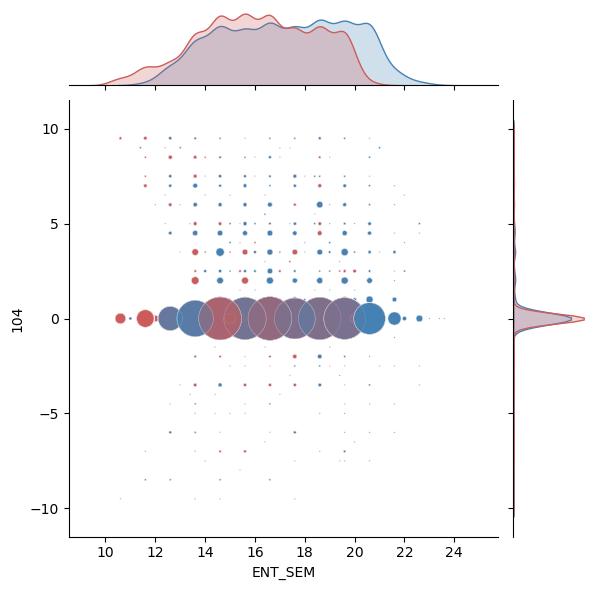

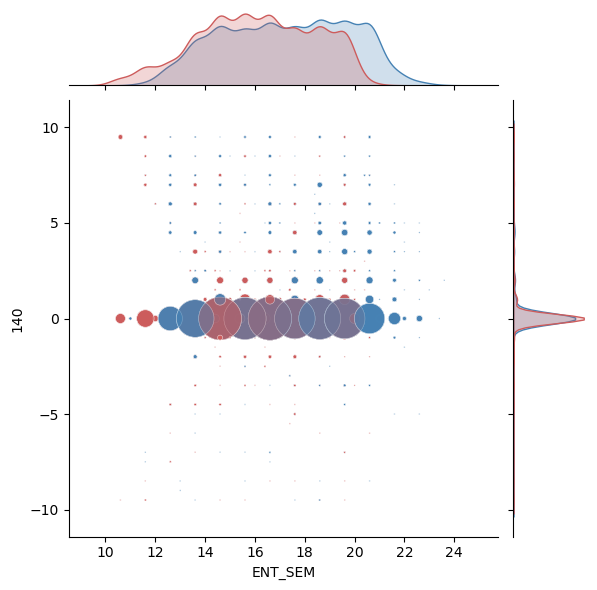

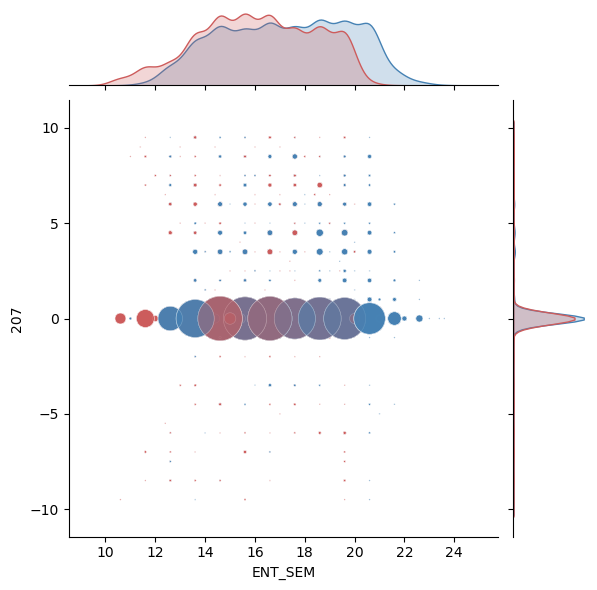

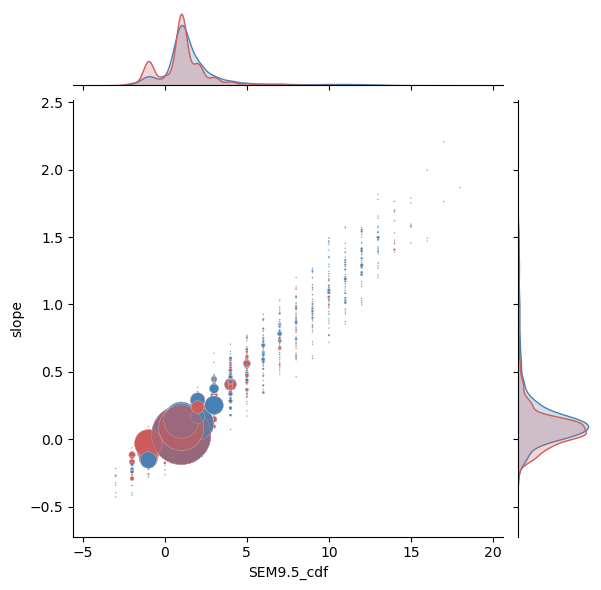

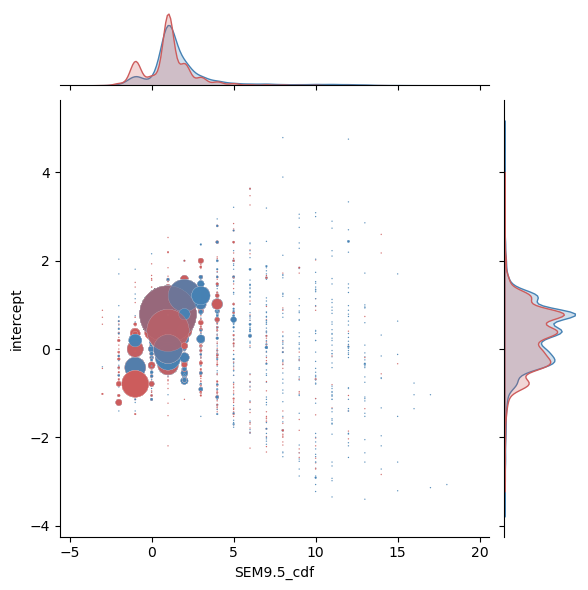

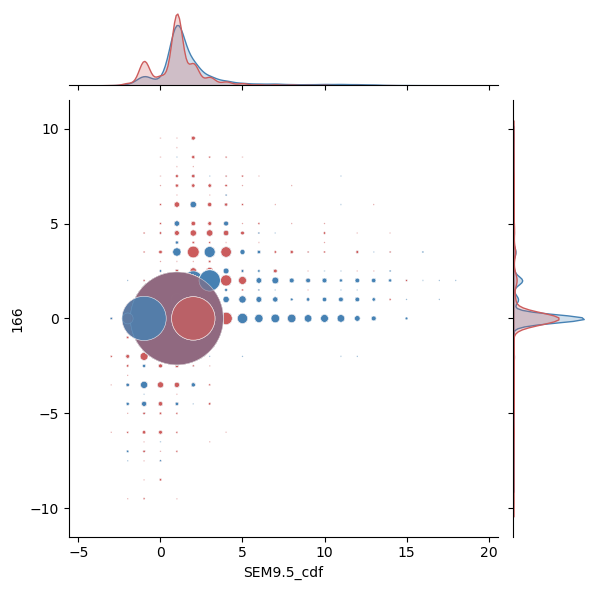

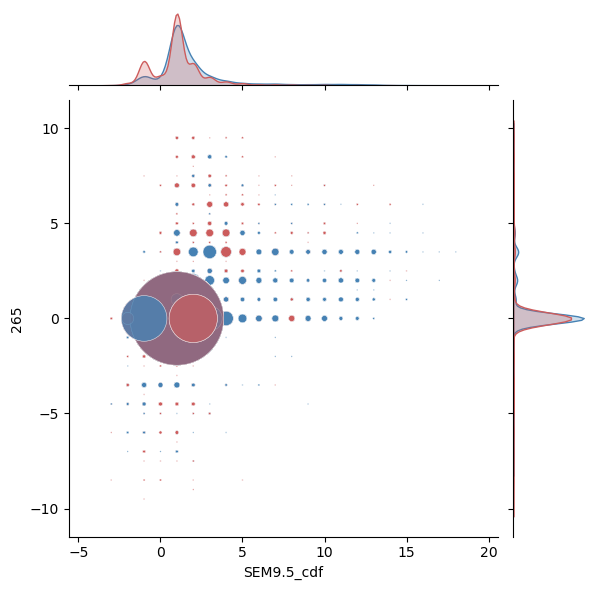

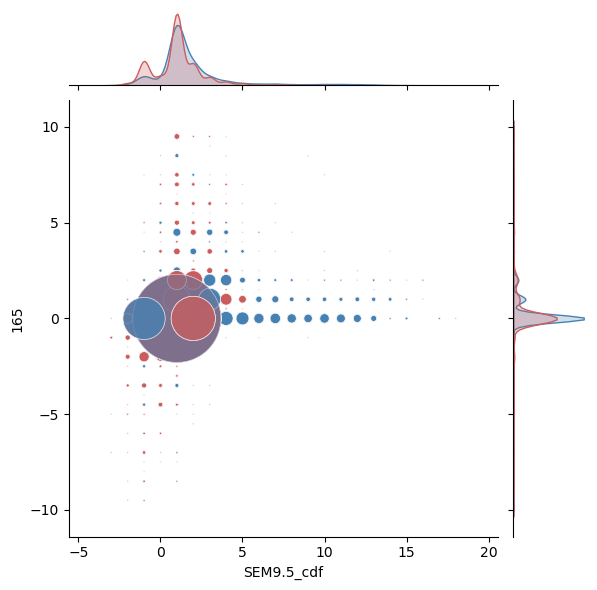

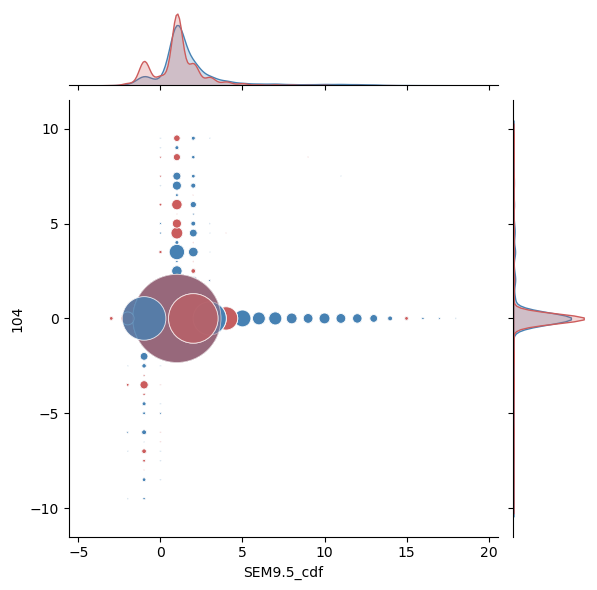

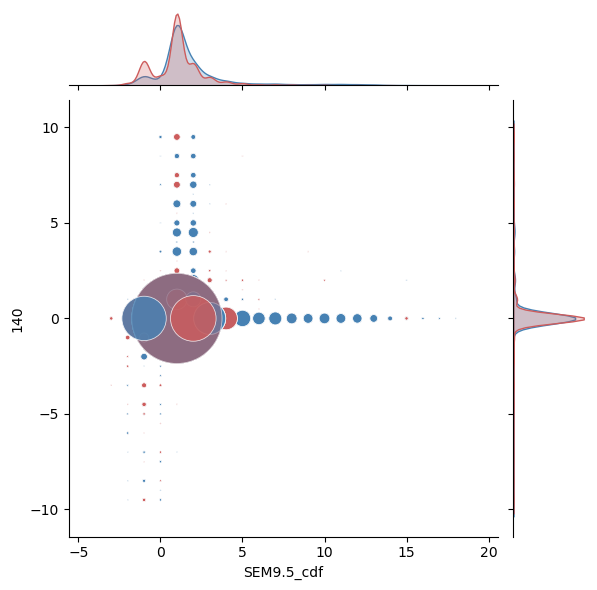

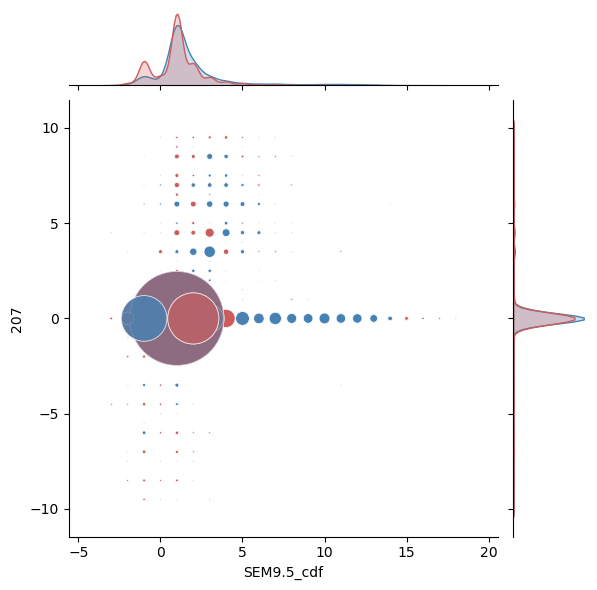

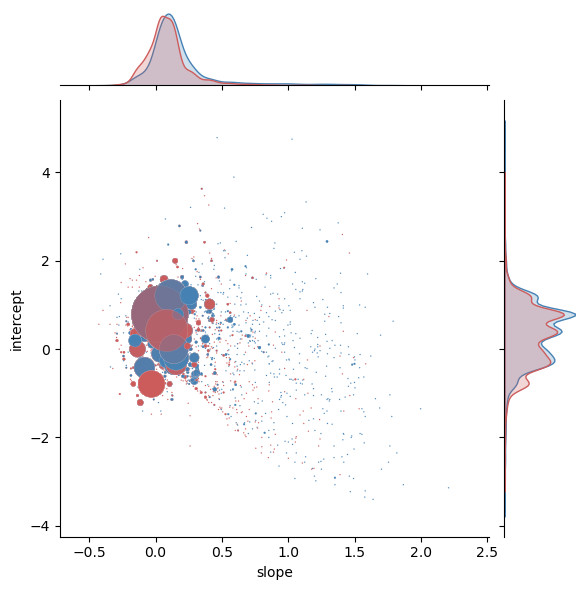

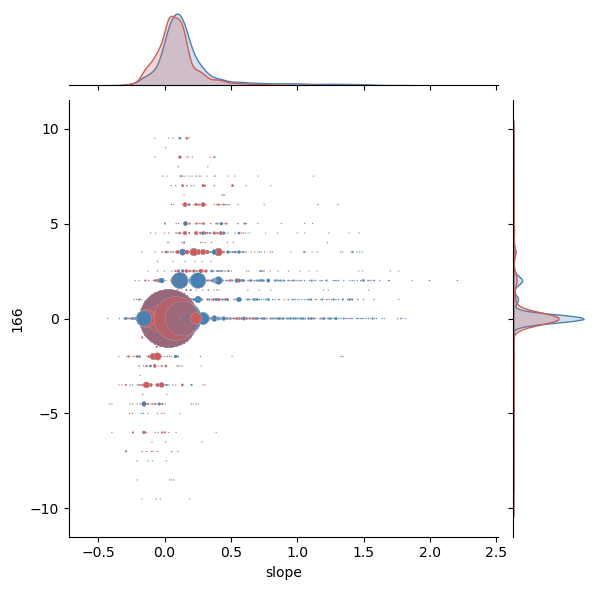

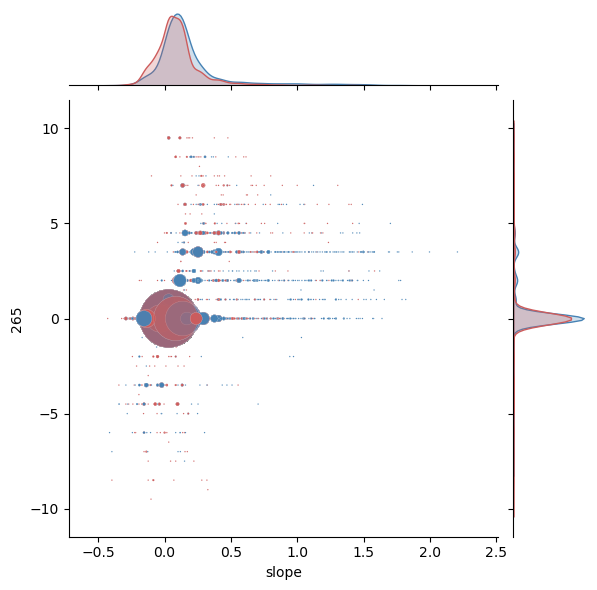

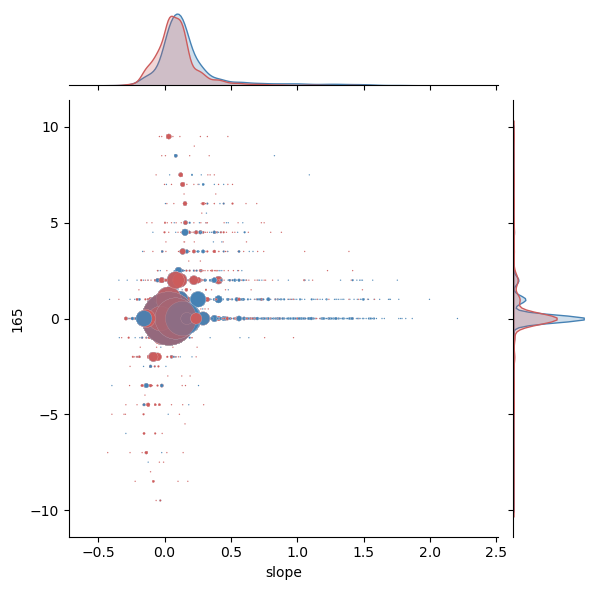

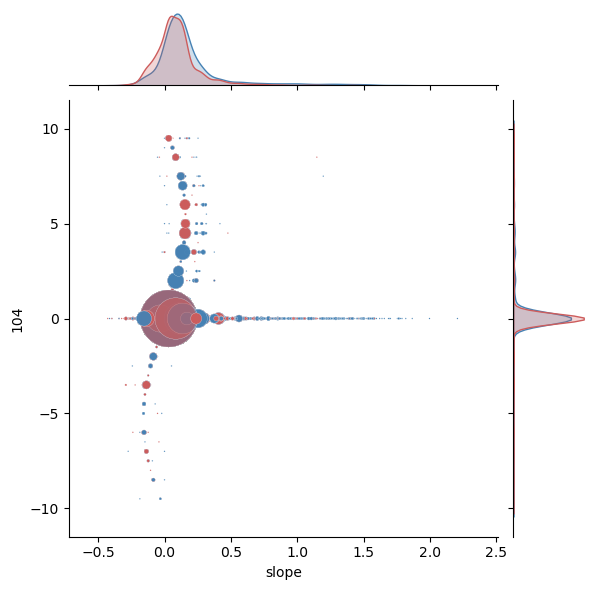

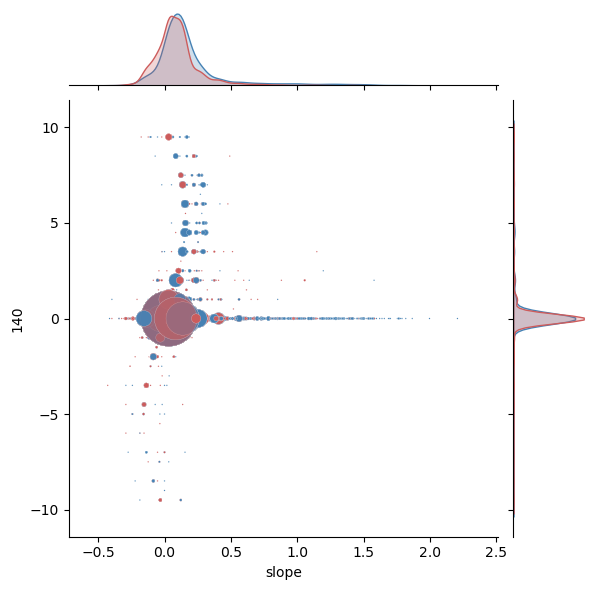

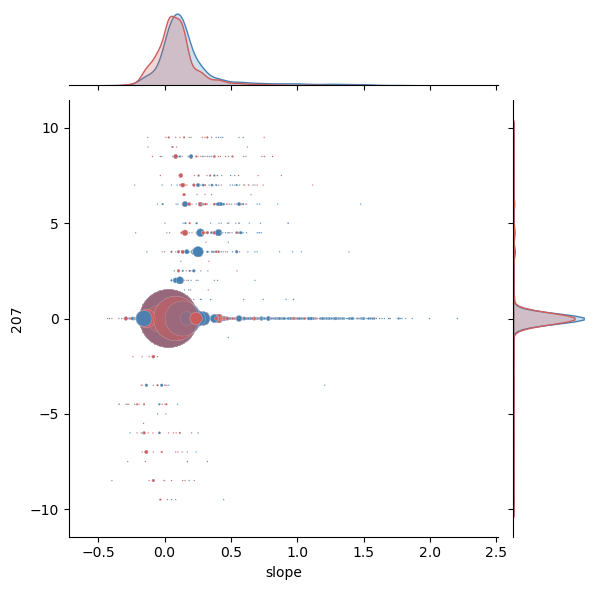

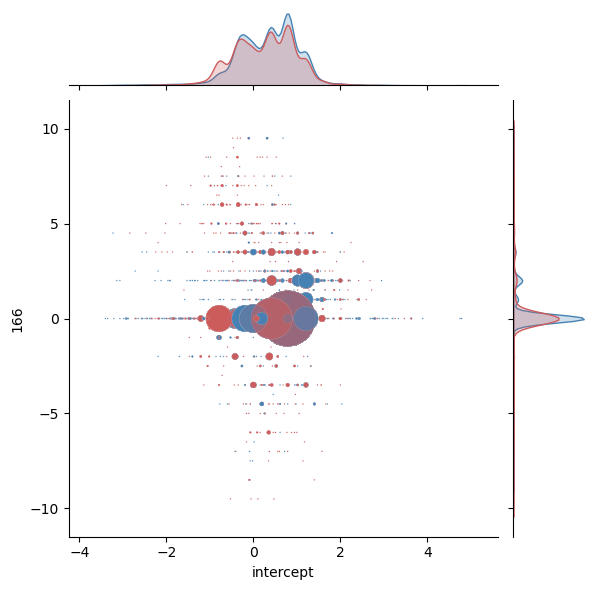

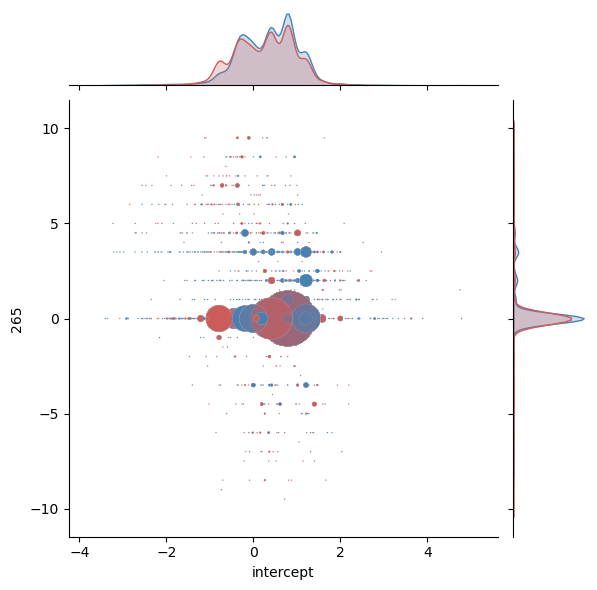

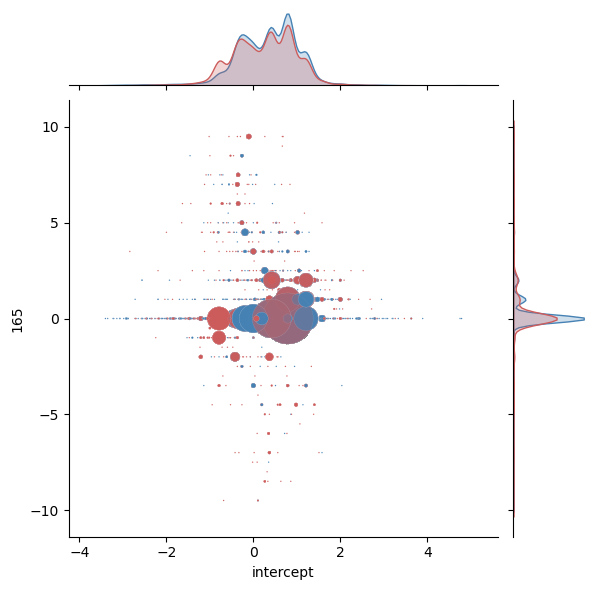

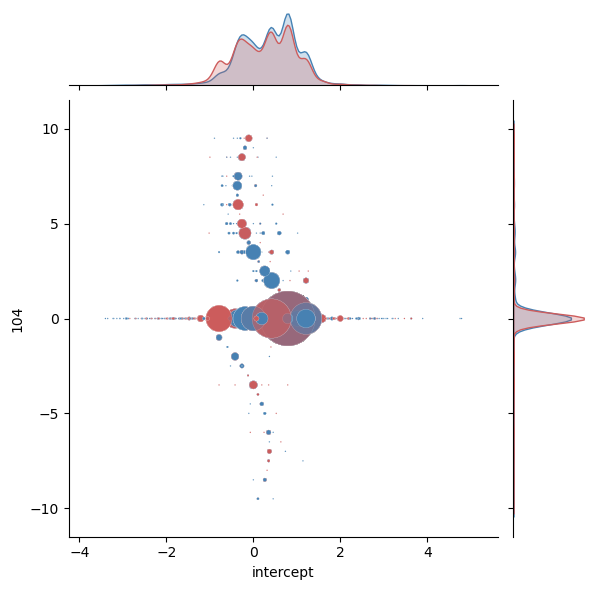

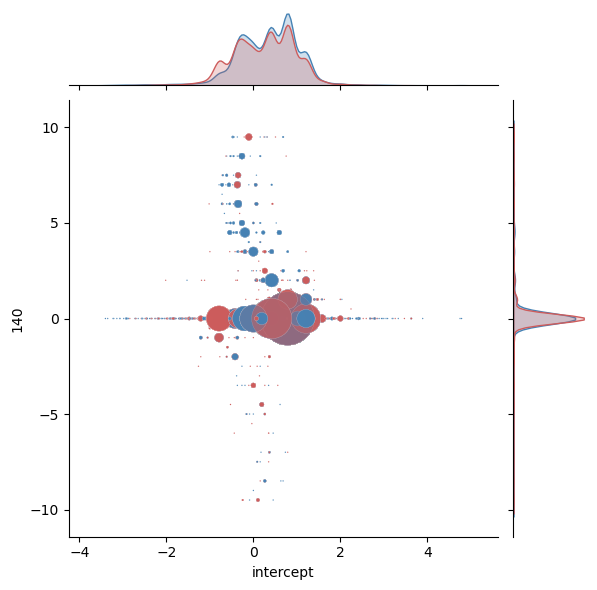

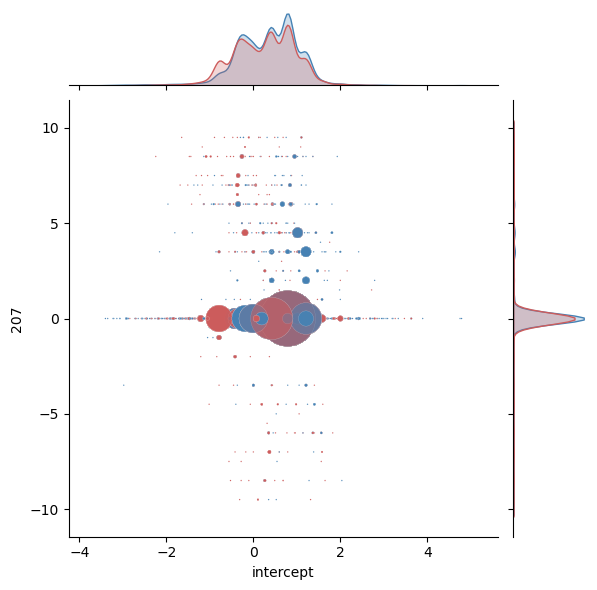

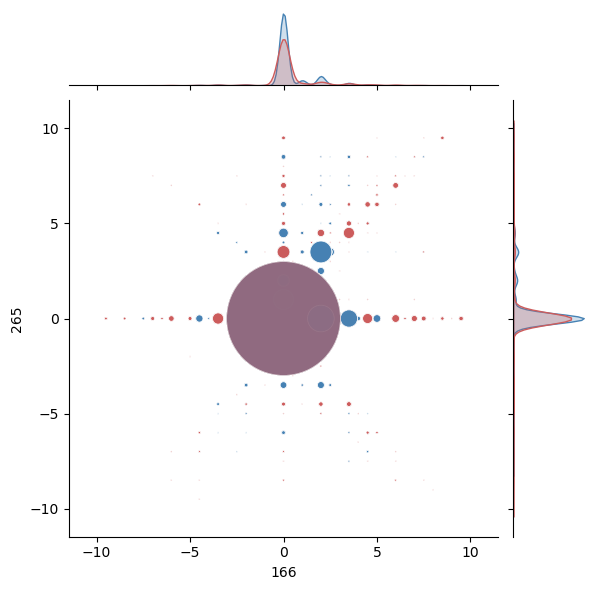

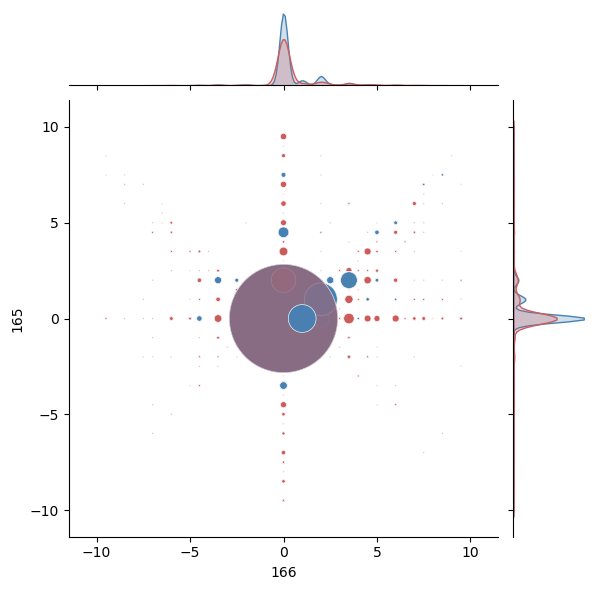

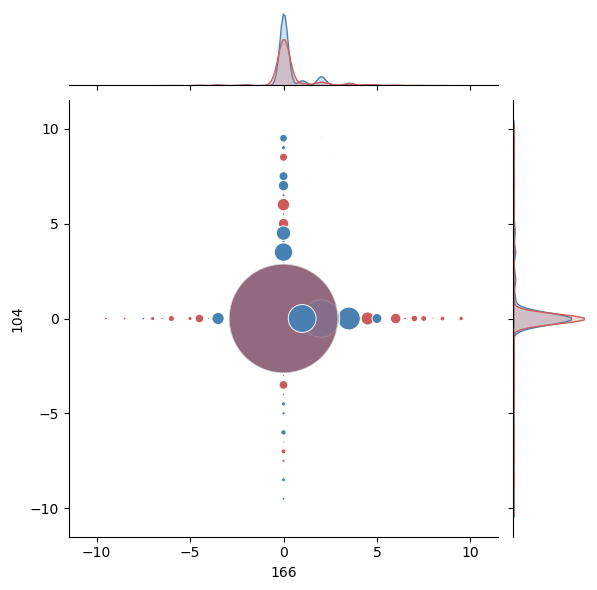

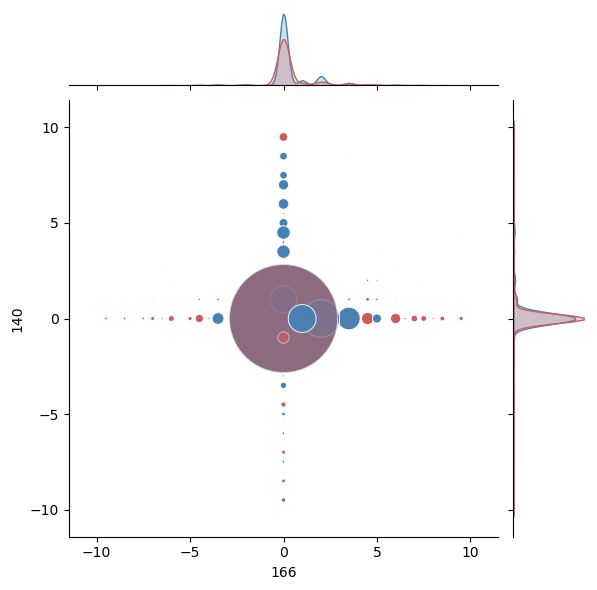

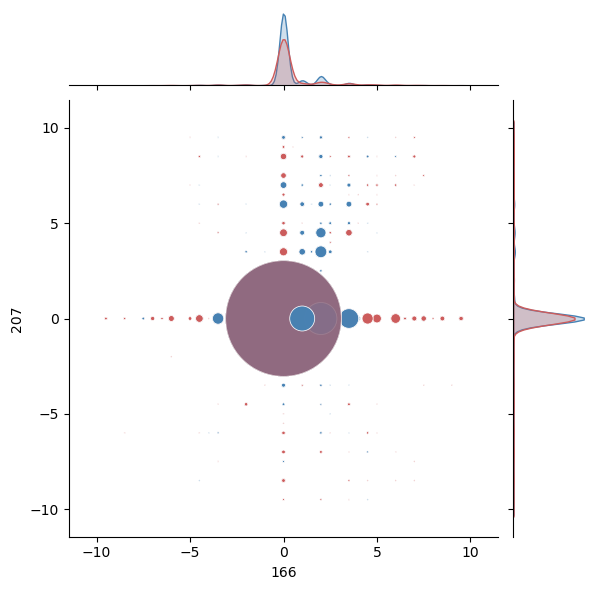

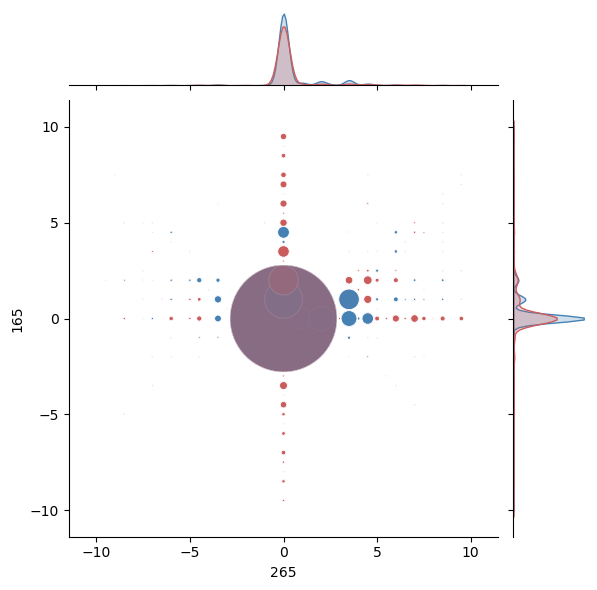

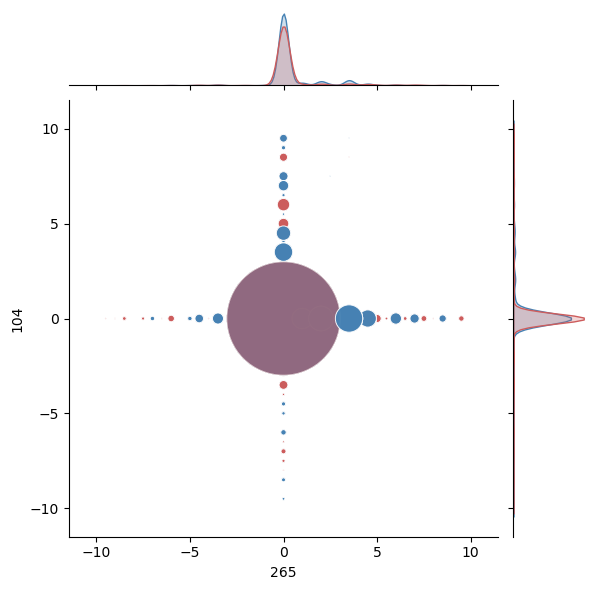

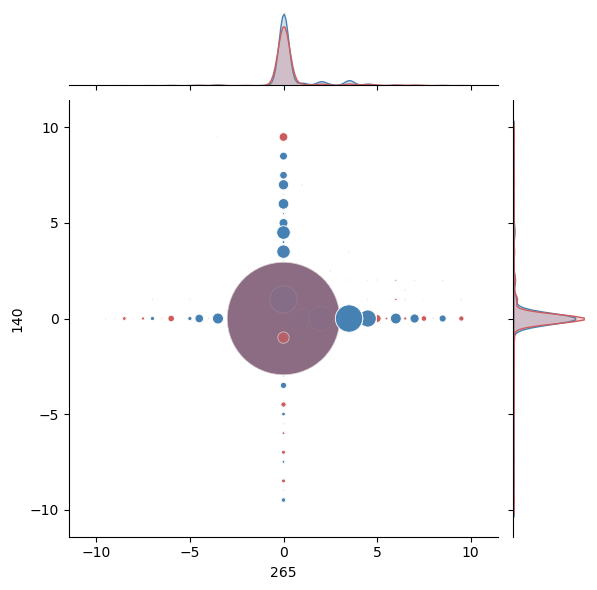

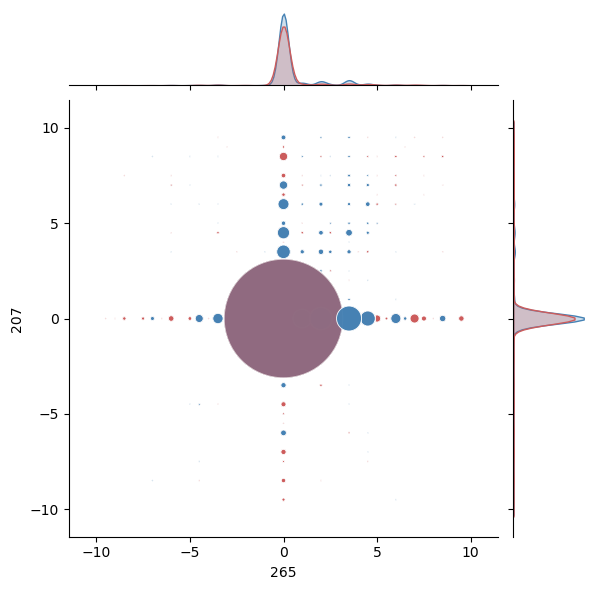

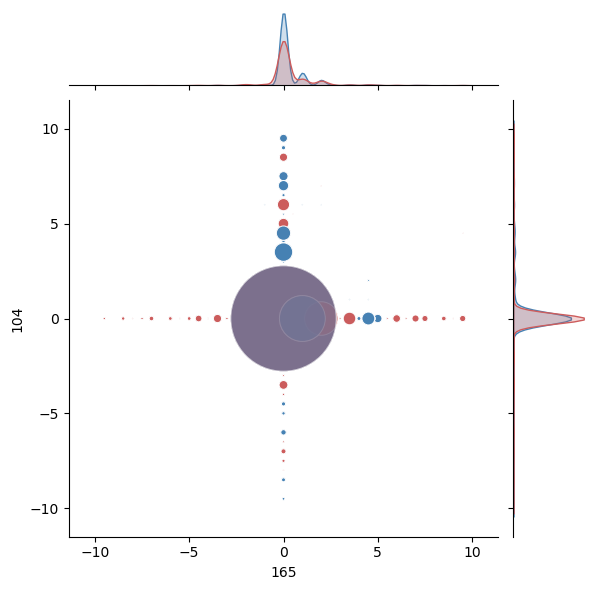

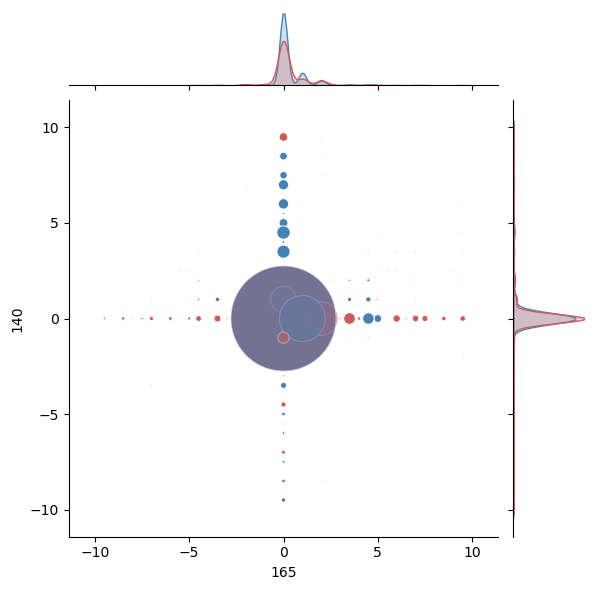

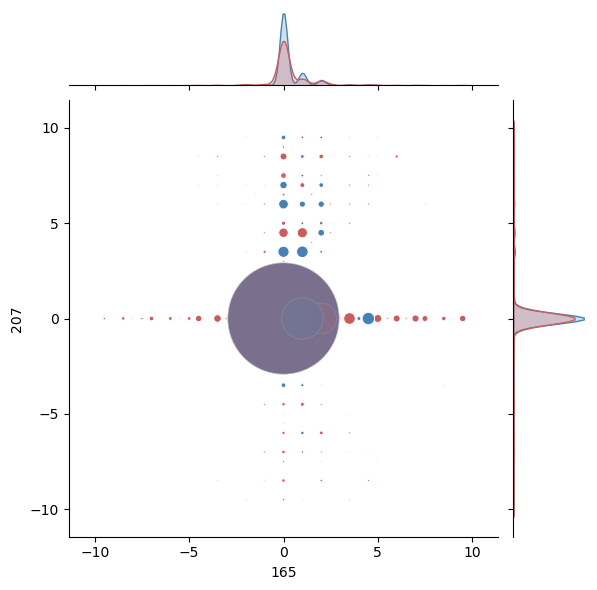

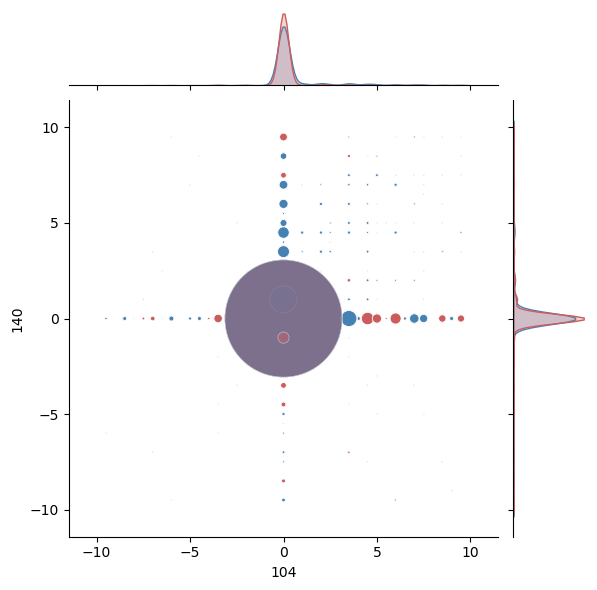

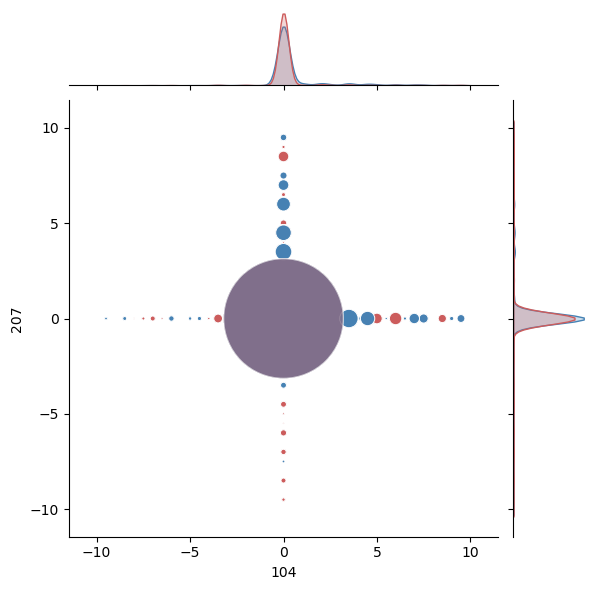

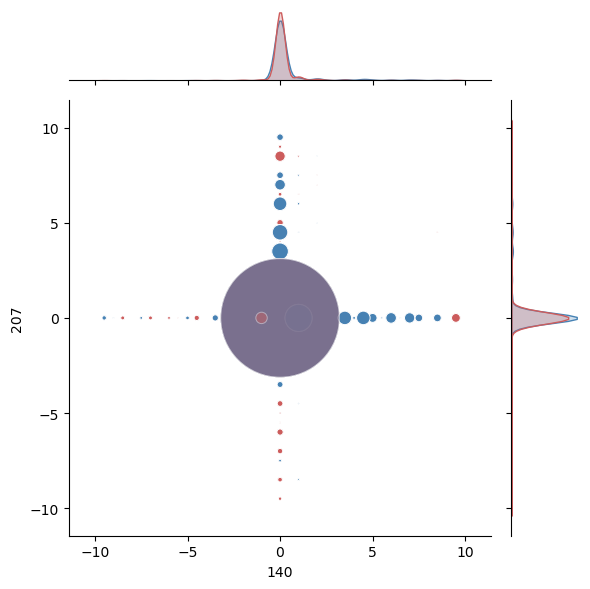

In [60]:
mylist = features2 + top_courses[:6]
#make a list of subsets of mylist, where each subset contains two distinct features
feature_pairs = [(feature1, feature2) for i, feature1 in enumerate(mylist) for j, feature2 in enumerate(mylist) if i < j]
index = 0

#make a 11x5 grid of subplots
# fig, ax = plt.subplots(9, 5, figsize=(10, 40))
# ax = ax.flatten()

#palette for coloring the points by the value of Y
palette = {0:'indianred', 1:'steelblue'}

#for each pair of distinct features in features_2 + top_courses[:6], plot a scatterplot of the two features. Color the points by the value of Y
for index, (feature1, feature2) in enumerate(feature_pairs):
    # Calculate the size of the dots based on the count of each pair of features
    counts = df.groupby([feature1, feature2]).size().reset_index(name='counts')
    merged_df = pd.merge(df, counts, on=[feature1, feature2])
    
    # Normalize counts to range between 0.3 and 1 for transparency
    norm_counts = 1 - 0.8*(merged_df['counts'] - merged_df['counts'].min()) / (merged_df['counts'].max() - merged_df['counts'].min())
    
    sns.jointplot(x=feature1, 
                  y=feature2, 
                  data=merged_df, 
                  hue='Y', 
                  palette=palette,
                  alpha=norm_counts,  # transparency varies with the count
                  s=merged_df['counts'],  # size of the dot varies with the count
                  legend=False)  # remove the legend from each subplot
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    #save figure to the folder 'jointplots' with the name 'jplot_{feature1}_vs_{feature2}.png'
    plt.savefig(f'jointplots/jplot_{feature1}_vs_{feature2}.png')
    index += 1

plt.tight_layout()
plt.show()

In [40]:
df_entropy = pd.DataFrame(columns=features)
for x in features:
    values = df[x].unique()
    #group df by x, and calculate the percentage of Y=1 for each value of x
    grouped = df.groupby(x)['Y'].value_counts(normalize=True).unstack()
    #calculate the conditional entropy of Y given x
    entropy = -grouped.apply(lambda x: x*np.log2(x)).sum(axis=1)
    #compute entropy of Y given x
    df_entropy.loc['entropy', x] = np.average(entropy, weights=grouped.sum(axis=1))

df_entropy.T.sort_values('entropy', ascending=False)

,entropy
104,0.868726
207,0.793847
101,0.772991
160,0.756551
140,0.743414
105,0.724159
SEM9.5_cdf,0.698504
265,0.655569
317,0.654578
150,0.653556
